# Rangkuman Chapter 4: Training Models

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 4 dengan implementasi Python untuk training models, termasuk Linear Regression, Gradient Descent, Polynomial Regression, Regularization, dan Logistic Regression.

## 1. Pengenalan

Chapter ini membahas **bagaimana model ML benar-benar bekerja** di balik layar.

### Topik Utama:
1. **Linear Regression**: Model paling sederhana
2. **Gradient Descent**: Algoritma optimization untuk training
3. **Polynomial Regression**: Untuk nonlinear data
4. **Learning Curves**: Mendeteksi overfitting/underfitting
5. **Regularization**: Ridge, Lasso, Elastic Net, Early Stopping
6. **Logistic Regression**: Binary classification
7. **Softmax Regression**: Multiclass classification

### Mengapa Penting?
- Membantu memilih model dan algorithm yang tepat
- Debug dan error analysis lebih efisien
- Foundation untuk neural networks

## 2. Linear Regression

Model linear membuat prediksi dengan menghitung weighted sum dari input features, plus bias term (intercept).

### 2.1 Model Equation

**Vectorized form**: \\( \hat{y} = \theta^T x = \theta \cdot x \\)

- \\( \hat{y} \\): predicted value
- \\( \theta \\): parameter vector (θ₀, θ₁, ..., θₙ)
- \\( x \\): feature vector (x₀=1, x₁, ..., xₙ)

### 2.2 Training Goal

Minimize **Mean Squared Error (MSE)** cost function:

\\[ MSE(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)})^2 \\]

In [70]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


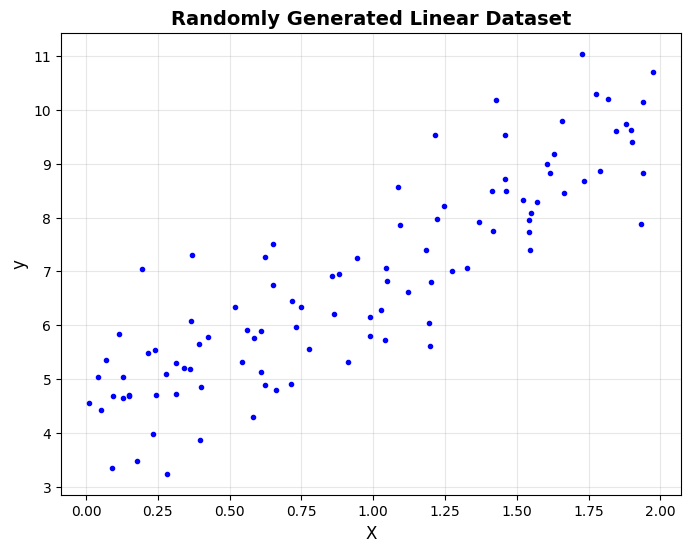

Dataset: 100 instances
True function: y = 4 + 3x + Gaussian noise


In [71]:
# Generate linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Randomly Generated Linear Dataset", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset: {len(X)} instances")
print(f"True function: y = 4 + 3x + Gaussian noise")

### 2.3 Normal Equation

**Closed-form solution** untuk mencari θ optimal:

\\[ \hat{\theta} = (X^T X)^{-1} X^T y \\]

In [72]:
# Normal Equation implementation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("=== Normal Equation ===")
print(f"θ₀ (intercept): {theta_best[0][0]:.2f}")
print(f"θ₁ (slope): {theta_best[1][0]:.2f}")
print(f"\nExpected: θ₀ = 4, θ₁ = 3")
print("Close enough! Noise menghambat recovery sempurna.")

=== Normal Equation ===
θ₀ (intercept): 4.22
θ₁ (slope): 2.77

Expected: θ₀ = 4, θ₁ = 3
Close enough! Noise menghambat recovery sempurna.


In [73]:
# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

print("=== Predictions ===")
print(f"X = 0: y = {y_predict[0][0]:.2f}")
print(f"X = 2: y = {y_predict[1][0]:.2f}")

=== Predictions ===
X = 0: y = 4.22
X = 2: y = 9.76


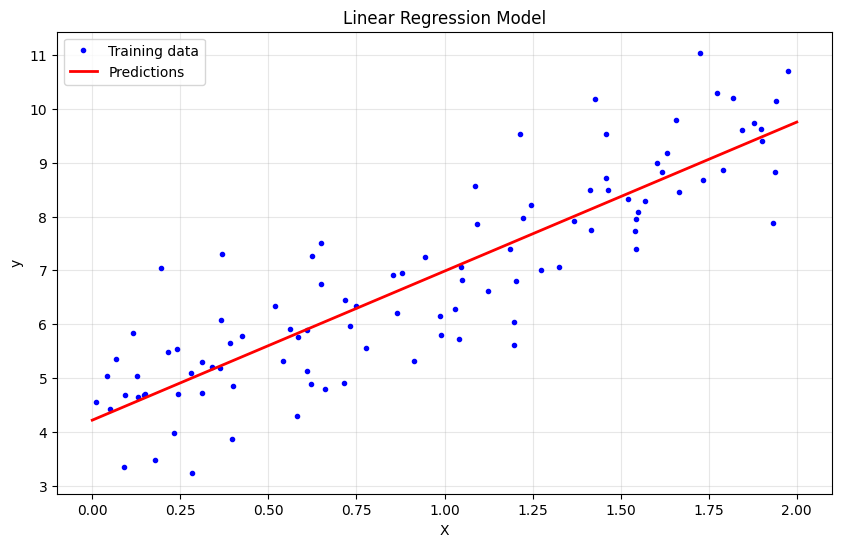

In [74]:
# Plot model
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Training data")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Model")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [75]:
# Menggunakan Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("\n=== Scikit-Learn LinearRegression ===")
print(f"Intercept: {lin_reg.intercept_[0]:.2f}")
print(f"Coefficient: {lin_reg.coef_[0][0]:.2f}")
print(f"\nPredictions: {lin_reg.predict(X_new).ravel()}")
print("\nSama dengan Normal Equation!")


=== Scikit-Learn LinearRegression ===
Intercept: 4.22
Coefficient: 2.77

Predictions: [4.21509616 9.75532293]

Sama dengan Normal Equation!


### 2.4 Computational Complexity

**Normal Equation**:
- Complexity: O(n²·⁴) to O(n³)
- Slow jika banyak features (>100,000)
- Fast untuk banyak instances (linear dengan m)

**SVD (Scikit-Learn)**:
- Complexity: O(n²)
- Lebih cepat dari Normal Equation
- Handles edge cases (singular matrices)

## 3. Gradient Descent

**Gradient Descent** adalah generic optimization algorithm yang iteratively tweak parameters untuk minimize cost function.

### Analogi:
Seperti berjalan turun gunung dalam kabut - ikuti slope yang paling curam.

### Key Concepts:
1. **Random initialization**: Mulai dengan θ random
2. **Iterative improvement**: Step kecil menuju minimum
3. **Learning rate (η)**: Ukuran step size
4. **Convergence**: Berhenti saat gradient ≈ 0

### 3.1 Batch Gradient Descent

Menggunakan **seluruh training set** untuk compute gradients di setiap step.

**Gradient vector**:

\\[ \nabla_\theta MSE(\theta) = \frac{2}{m} X^T (X\theta - y) \\]

**Update rule**:

\\[ \theta^{(next)} = \theta - \eta \nabla_\theta MSE(\theta) \\]

In [76]:
# Batch Gradient Descent implementation
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("=== Batch Gradient Descent ===")
print(f"θ₀: {theta[0][0]:.2f}")
print(f"θ₁: {theta[1][0]:.2f}")
print("\nSama dengan Normal Equation! GD worked perfectly.")

=== Batch Gradient Descent ===
θ₀: 4.22
θ₁: 2.77

Sama dengan Normal Equation! GD worked perfectly.


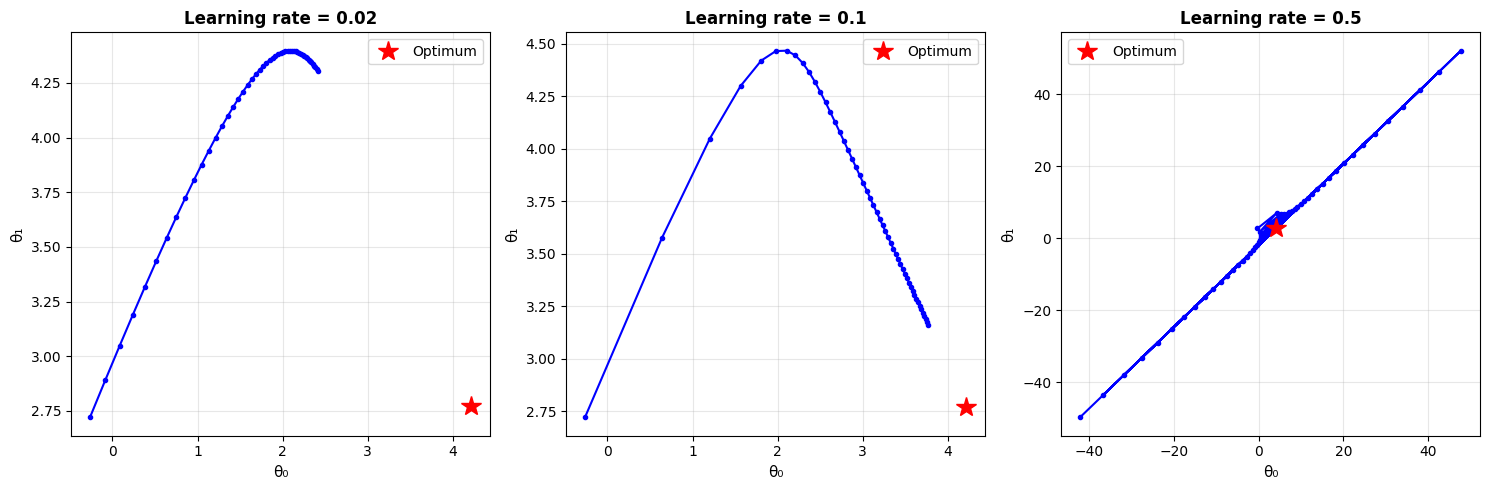

Observasi:
- η terlalu kecil: slow convergence
- η pas: converge dengan cepat
- η terlalu besar: diverge


In [77]:
# Visualisasi GD dengan berbagai learning rates
theta_path_bgd = []

def plot_gradient_descent(theta, eta, n_iterations=1000):
    m = len(X_b)
    theta_path = [theta]
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    
    return theta_path

theta_start = np.random.randn(2, 1)

learning_rates = [0.02, 0.1, 0.5]
plt.figure(figsize=(15, 5))

for idx, eta in enumerate(learning_rates, 1):
    theta_path = plot_gradient_descent(theta_start.copy(), eta, n_iterations=50)
    
    plt.subplot(1, 3, idx)
    theta_path = np.array(theta_path)
    plt.plot(theta_path[:, 0], theta_path[:, 1], "b-o", markersize=3)
    plt.plot(theta_best[0], theta_best[1], "r*", markersize=15, label="Optimum")
    plt.xlabel("θ₀", fontsize=11)
    plt.ylabel("θ₁", fontsize=11)
    plt.title(f"Learning rate = {eta}", fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observasi:")
print("- η terlalu kecil: slow convergence")
print("- η pas: converge dengan cepat")
print("- η terlalu besar: diverge")

### 3.2 Stochastic Gradient Descent

**SGD** picks **random instance** di setiap step, bukan seluruh training set.

**Advantages**:
- Much faster (little data per iteration)
- Possible untuk train on huge datasets (out-of-core)
- Better chance escape local minima

**Disadvantages**:
- Less regular (bouncing around)
- Never settles exactly at minimum

**Solution**: **Learning schedule** - gradually reduce learning rate

In [78]:
# Stochastic Gradient Descent implementation
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("=== Stochastic Gradient Descent ===")
print(f"θ₀: {theta[0][0]:.2f}")
print(f"θ₁: {theta[1][0]:.2f}")
print("\nCukup dekat dengan solusi optimal!")

=== Stochastic Gradient Descent ===
θ₀: 4.18
θ₁: 2.73

Cukup dekat dengan solusi optimal!


In [79]:
# Menggunakan Scikit-Learn SGDRegressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print("=== Scikit-Learn SGDRegressor ===")
print(f"Intercept: {sgd_reg.intercept_[0]:.2f}")
print(f"Coefficient: {sgd_reg.coef_[0]:.2f}")

=== Scikit-Learn SGDRegressor ===
Intercept: 4.24
Coefficient: 2.83


### 3.3 Mini-batch Gradient Descent

**Middle ground** antara Batch GD dan Stochastic GD.

Compute gradients pada **small random sets** (mini-batches).

**Advantages**:
- Performance boost dari hardware optimization (GPUs)
- Less erratic than Stochastic GD
- Walks closer to minimum than Stochastic GD

### 3.4 Comparison of Gradient Descent Algorithms

| Algorithm | Large m | Out-of-core | Large n | Hyperparams | Scaling Required |
|-----------|---------|-------------|---------|-------------|------------------|
| **Batch GD** | Slow | No | Fast | 2 | Yes |
| **Stochastic GD** | Fast | Yes | Fast | ≥2 | Yes |
| **Mini-batch GD** | Fast | Yes | Fast | ≥2 | Yes |

## 4. Polynomial Regression

**Polynomial Regression** uses linear model untuk fit **nonlinear data** dengan menambahkan powers dari features sebagai features baru.

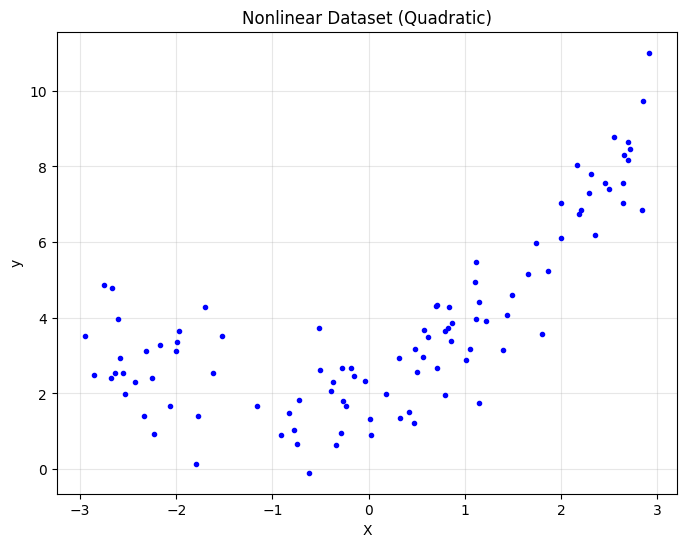

True function: y = 0.5x² + x + 2 + noise
Linear model tidak akan fit data ini dengan baik.


In [80]:
# Generate nonlinear data
m = 100
X_poly = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly**2 + X_poly + 2 + np.random.randn(m, 1)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.plot(X_poly, y_poly, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Nonlinear Dataset (Quadratic)")
plt.grid(True, alpha=0.3)
plt.show()

print("True function: y = 0.5x² + x + 2 + noise")
print("Linear model tidak akan fit data ini dengan baik.")

In [81]:
# Transform data dengan PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

print("=== Polynomial Features ===")
print(f"Original feature: {X_poly[0]}")
print(f"Transformed features: {X_poly_transformed[0]}")
print("\n[x, x²] - Square feature ditambahkan!")

=== Polynomial Features ===
Original feature: [0.82993344]
Transformed features: [0.82993344 0.68878951]

[x, x²] - Square feature ditambahkan!


In [82]:
# Fit Linear Regression pada transformed data
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_transformed, y_poly)

print("\n=== Polynomial Regression Model ===")
print(f"Intercept: {lin_reg_poly.intercept_[0]:.2f}")
print(f"Coefficients: {lin_reg_poly.coef_[0]}")
print(f"\nModel: y = {lin_reg_poly.intercept_[0]:.2f} + {lin_reg_poly.coef_[0][0]:.2f}x + {lin_reg_poly.coef_[0][1]:.2f}x²")
print("\nExpected: y = 2.0 + 1.0x + 0.5x²")
print("Cukup dekat!")


=== Polynomial Regression Model ===
Intercept: 2.11
Coefficients: [0.9558374  0.51182025]

Model: y = 2.11 + 0.96x + 0.51x²

Expected: y = 2.0 + 1.0x + 0.5x²
Cukup dekat!


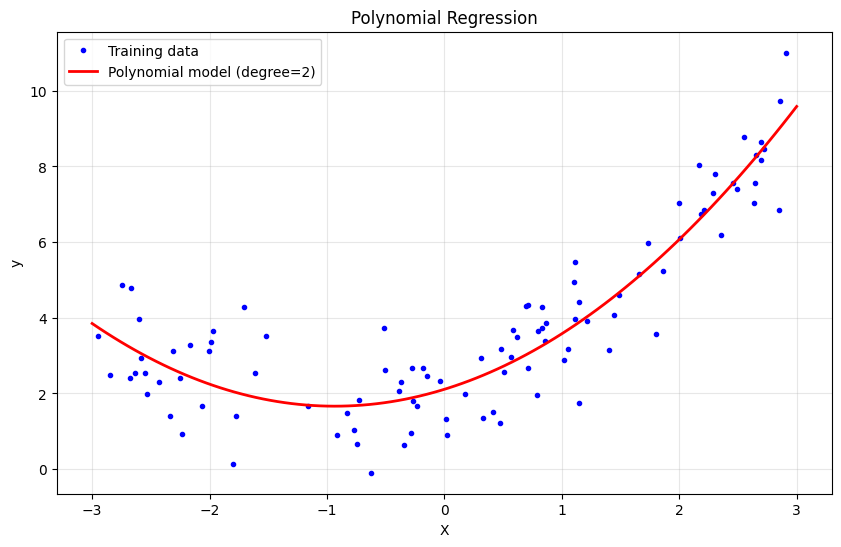

In [83]:
# Plot polynomial model
X_new_poly = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly_transformed = poly_features.transform(X_new_poly)
y_new_poly = lin_reg_poly.predict(X_new_poly_transformed)

plt.figure(figsize=(10, 6))
plt.plot(X_poly, y_poly, "b.", label="Training data")
plt.plot(X_new_poly, y_new_poly, "r-", linewidth=2, label="Polynomial model (degree=2)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

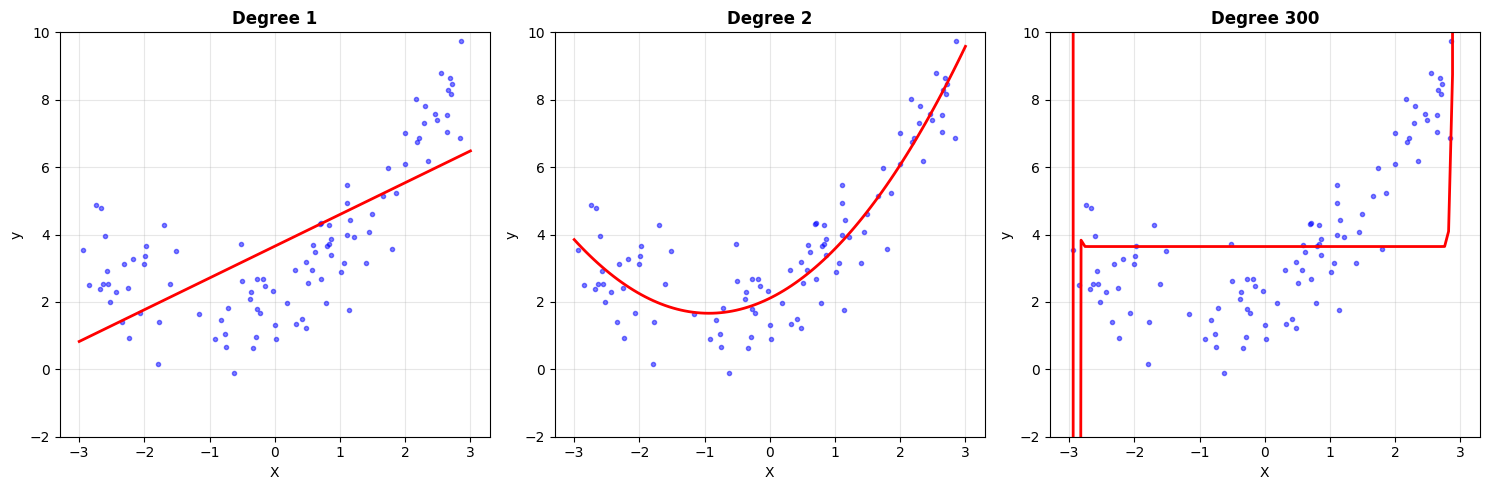

Observasi:
- Degree 1 (linear): UNDERFITTING
- Degree 2 (quadratic): GOOD FIT
- Degree 300: SEVERE OVERFITTING (wiggles too much)


In [84]:
# Compare models dengan berbagai degrees
from sklearn.pipeline import Pipeline

degrees = [1, 2, 300]
plt.figure(figsize=(15, 5))

for idx, degree in enumerate(degrees, 1):
    plt.subplot(1, 3, idx)
    
    poly_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])
    
    poly_pipeline.fit(X_poly, y_poly)
    y_pred = poly_pipeline.predict(X_new_poly)
    
    plt.plot(X_poly, y_poly, "b.", alpha=0.5)
    plt.plot(X_new_poly, y_pred, "r-", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Degree {degree}", fontweight='bold')
    plt.ylim(-2, 10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observasi:")
print("- Degree 1 (linear): UNDERFITTING")
print("- Degree 2 (quadratic): GOOD FIT")
print("- Degree 300: SEVERE OVERFITTING (wiggles too much)")

## 5. Learning Curves

**Learning curves** adalah plots dari model performance (training & validation) sebagai function dari training set size.

Berguna untuk:
- Detect overfitting/underfitting
- Decide apakah perlu more training data

In [85]:
# Function untuk plot learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True, alpha=0.3)

print("Function plot_learning_curves() ready!")

Function plot_learning_curves() ready!


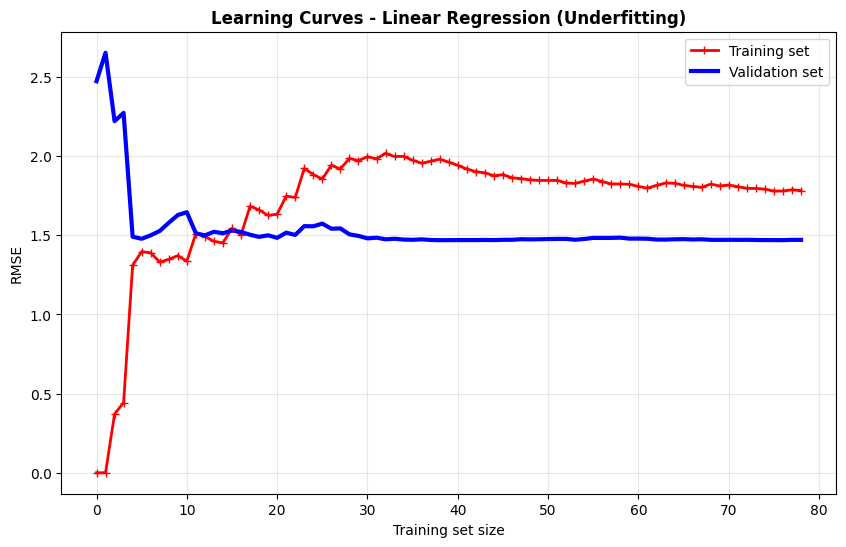

Observasi:
- Both curves reach plateau
- Both curves close and fairly high
- Typical sign of UNDERFITTING
- More training data won't help!


In [86]:
# Learning curves untuk Linear Regression (underfitting)
plt.figure(figsize=(10, 6))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y_poly)
plt.title("Learning Curves - Linear Regression (Underfitting)", fontweight='bold')
plt.show()

print("Observasi:")
print("- Both curves reach plateau")
print("- Both curves close and fairly high")
print("- Typical sign of UNDERFITTING")
print("- More training data won't help!")

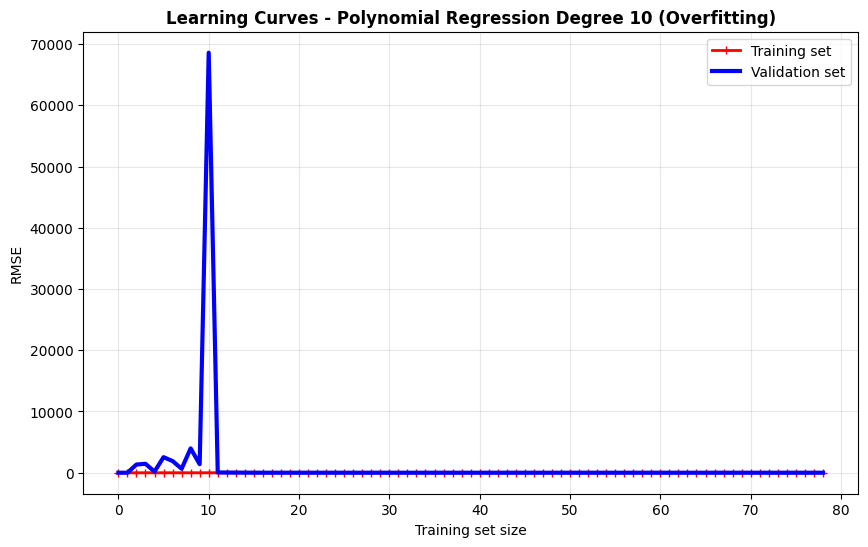

Observasi:
- Training error much lower than Linear Regression
- GAP between training and validation curves
- Typical sign of OVERFITTING
- More training data can help close the gap!


In [87]:
# Learning curves untuk Polynomial Regression (overfitting)
plt.figure(figsize=(10, 6))
polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_reg, X_poly, y_poly)
plt.title("Learning Curves - Polynomial Regression Degree 10 (Overfitting)", fontweight='bold')
plt.show()

print("Observasi:")
print("- Training error much lower than Linear Regression")
print("- GAP between training and validation curves")
print("- Typical sign of OVERFITTING")
print("- More training data can help close the gap!")

## 6. Regularized Linear Models

**Regularization** constrains model untuk reduce overfitting.

### 6.1 Ridge Regression (L2 Regularization)

**Cost function**:

\\[ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 \\]

- \\( \alpha \\): regularization strength
- α = 0: plain Linear Regression
- α very large: flat line through data mean

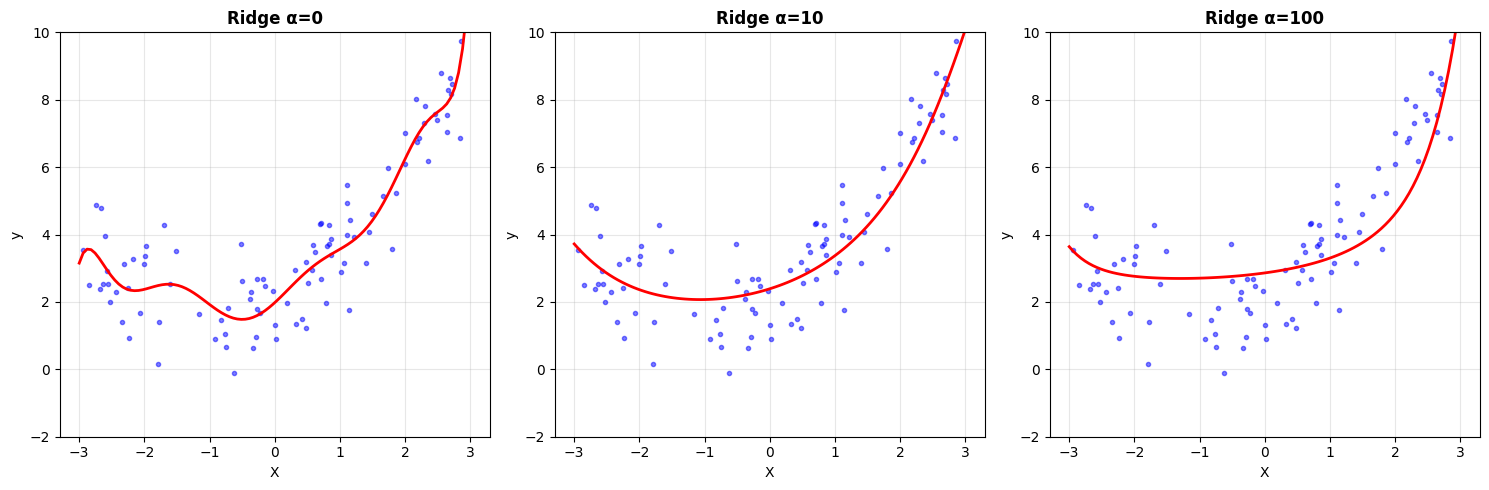

Observasi:
- α=0: No regularization (overfitting)
- α=10: Moderate regularization (good)
- α=100: Strong regularization (flatter, reduced variance)


In [88]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Prepare polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly_train = poly_features.fit_transform(X_poly)

# Scale features (important for Ridge!)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_train)

# Train Ridge models dengan berbagai α values
alphas = [0, 10, 100]
plt.figure(figsize=(15, 5))

for idx, alpha in enumerate(alphas, 1):
    plt.subplot(1, 3, idx)
    
    ridge_reg = Ridge(alpha=alpha, solver="cholesky", random_state=42)
    ridge_reg.fit(X_poly_scaled, y_poly)
    
    X_new_poly = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly_features = poly_features.transform(X_new_poly)
    X_new_poly_scaled = scaler.transform(X_new_poly_features)
    y_pred = ridge_reg.predict(X_new_poly_scaled)
    
    plt.plot(X_poly, y_poly, "b.", alpha=0.5)
    plt.plot(X_new_poly, y_pred, "r-", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Ridge α={alpha}", fontweight='bold')
    plt.ylim(-2, 10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observasi:")
print("- α=0: No regularization (overfitting)")
print("- α=10: Moderate regularization (good)")
print("- α=100: Strong regularization (flatter, reduced variance)")

### 6.2 Lasso Regression (L1 Regularization)

**Cost function**:

\\[ J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| \\]

**Key feature**: Lasso tends to **eliminate** weights of least important features (set to zero).

→ **Automatic feature selection**

→ **Sparse model** (few nonzero weights)

C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of

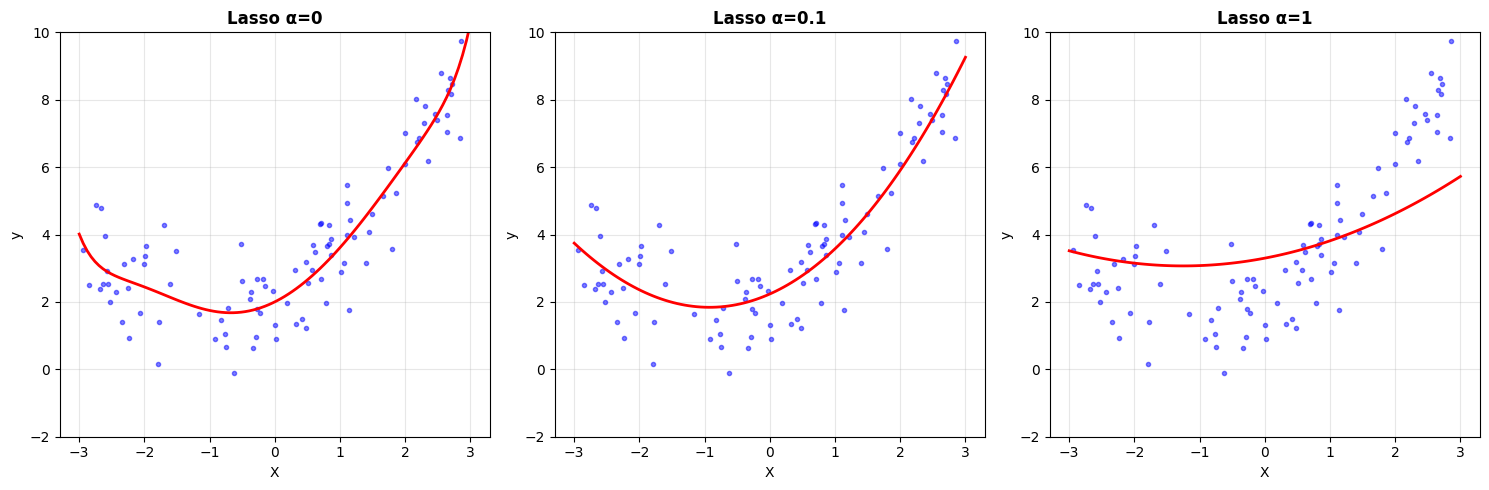

Lasso automatically performs feature selection!


In [89]:
# Lasso Regression
from sklearn.linear_model import Lasso

alphas = [0, 0.1, 1]
plt.figure(figsize=(15, 5))

for idx, alpha in enumerate(alphas, 1):
    plt.subplot(1, 3, idx)
    
    lasso_reg = Lasso(alpha=alpha, random_state=42)
    lasso_reg.fit(X_poly_scaled, y_poly)
    
    y_pred = lasso_reg.predict(X_new_poly_scaled)
    
    plt.plot(X_poly, y_poly, "b.", alpha=0.5)
    plt.plot(X_new_poly, y_pred, "r-", linewidth=2)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Lasso α={alpha}", fontweight='bold')
    plt.ylim(-2, 10)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Lasso automatically performs feature selection!")

### 6.3 Elastic Net

**Middle ground** antara Ridge dan Lasso.

**Cost function**:

\\[ J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2 \\]

- r = 0: Ridge Regression
- r = 1: Lasso Regression

### When to use?
- **Ridge**: Good default
- **Lasso**: When few features are useful
- **Elastic Net**: Preferred over Lasso (more stable)

In [90]:
# Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_poly_scaled, y_poly)

print("=== Elastic Net ===")
print(f"Alpha: 0.1")
print(f"l1_ratio (mix ratio r): 0.5")
print(f"\nPrediction for X=1.5: {elastic_net.predict(scaler.transform(poly_features.transform([[1.5]])))[0]:.2f}")

=== Elastic Net ===
Alpha: 0.1
l1_ratio (mix ratio r): 0.5

Prediction for X=1.5: 4.39


### 6.4 Early Stopping

**Different approach** untuk regularization: Stop training saat validation error reaches minimum.

Geoffrey Hinton: **"Beautiful free lunch"**

=== Early Stopping ===
Best epoch: 499
Minimum validation error: 0.8494


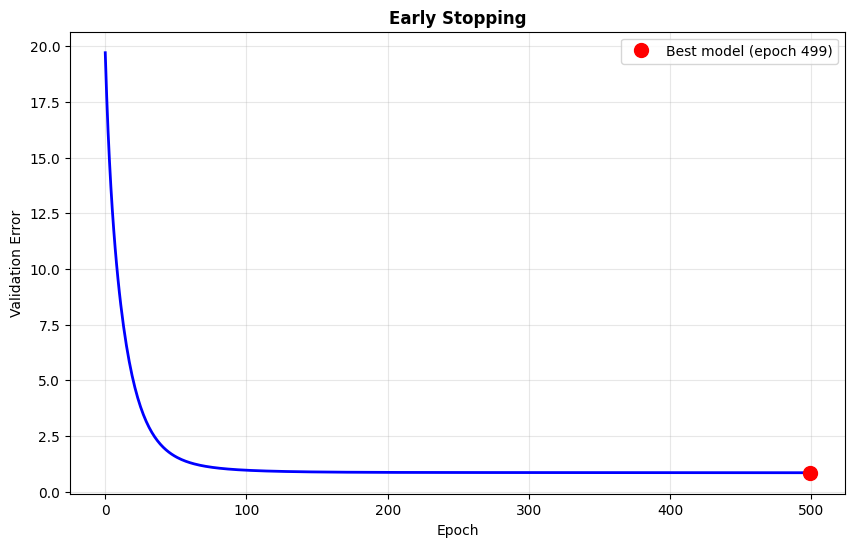

In [91]:
# Early Stopping implementation
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X_poly_scaled, y_poly, 
                                                    test_size=0.2, random_state=42)

# tol must be non-negative float or None; use None to disable tol-based stopping
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, 
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
val_errors = []

for epoch in range(500):
    sgd_reg.fit(X_train, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"=== Early Stopping ===")
print(f"Best epoch: {best_epoch}")
print(f"Minimum validation error: {minimum_val_error:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(val_errors, "b-", linewidth=2)
plt.plot(best_epoch, minimum_val_error, "ro", markersize=10, label=f"Best model (epoch {best_epoch})")
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
plt.title("Early Stopping", fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Logistic Regression

**Logistic Regression** untuk estimate probability bahwa instance belongs to particular class.

### 7.1 Model

**Estimated probability**:

\\[ \hat{p} = h_\theta(x) = \sigma(\theta^T x) \\]

**Sigmoid function**:

\\[ \sigma(t) = \frac{1}{1 + e^{-t}} \\]

**Prediction**:

\\[ \hat{y} = \begin{cases} 0 & \text{if } \hat{p} < 0.5 \\\\ 1 & \text{if } \hat{p} \geq 0.5 \end{cases} \\]

In [92]:
# Load iris dataset
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X_iris = iris["data"][:, 3:]  # petal width
y_iris = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

print("=== Iris Dataset ===")
print(f"Feature: Petal width")
print(f"Target: 1 if Iris virginica, 0 otherwise")
print(f"Samples: {len(X_iris)}")

=== Iris Dataset ===
Feature: Petal width
Target: 1 if Iris virginica, 0 otherwise
Samples: 150


In [93]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_iris, y_iris)

print("Logistic Regression model trained!")

Logistic Regression model trained!


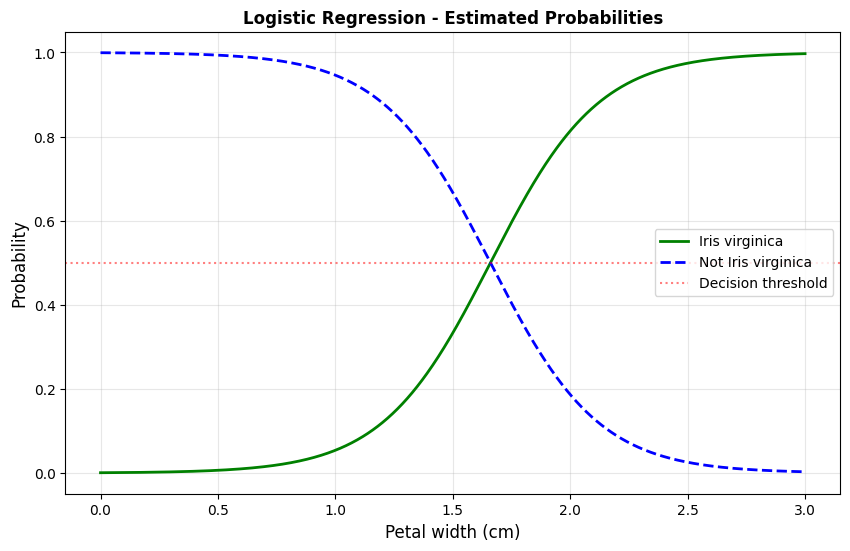

Decision boundary sekitar 1.6 cm


In [94]:
# Plot probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.axhline(0.5, color='r', linestyle=':', alpha=0.5, label='Decision threshold')
plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title("Logistic Regression - Estimated Probabilities", fontweight='bold')
plt.legend(loc="best")
plt.grid(True, alpha=0.3)
plt.show()

print("Decision boundary sekitar 1.6 cm")

In [95]:
# Make predictions
predictions = log_reg.predict([[1.7], [1.5]])

print("=== Predictions ===")
print(f"Petal width = 1.7 cm: {predictions[0]} (Iris virginica)")
print(f"Petal width = 1.5 cm: {predictions[1]} (Not Iris virginica)")

=== Predictions ===
Petal width = 1.7 cm: 1 (Iris virginica)
Petal width = 1.5 cm: 0 (Not Iris virginica)


### 7.2 Cost Function

**Log Loss (Cross Entropy)**:

\\[ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{p}^{(i)}) + (1-y^{(i)}) \log(1-\hat{p}^{(i)})] \\]

**Properties**:
- Convex function
- No closed-form solution
- Gradient Descent guaranteed to find global minimum

## 8. Softmax Regression (Multinomial Logistic Regression)

**Generalization** dari Logistic Regression untuk **multiple classes**.

### 8.1 Model

**Score untuk class k**:

\\[ s_k(x) = \theta^{(k)T} x \\]

**Softmax function**:

\\[ \hat{p}_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))} \\]

**Prediction**:

\\[ \hat{y} = \arg\max_k \sigma(s(x))_k \\]

In [96]:
# Softmax Regression untuk all 3 iris classes
X_iris_full = iris["data"][:, (2, 3)]  # petal length, petal width
y_iris_full = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", 
                                 C=10, random_state=42)
softmax_reg.fit(X_iris_full, y_iris_full)

print("=== Softmax Regression ===")
print("3 classes: Iris setosa (0), Iris versicolor (1), Iris virginica (2)")
print("Features: Petal length, Petal width")

=== Softmax Regression ===
3 classes: Iris setosa (0), Iris versicolor (1), Iris virginica (2)
Features: Petal length, Petal width


C:\Users\HP Pavilion 15\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [97]:
# Make prediction
test_sample = [[5, 2]]  # petal length=5cm, width=2cm

prediction = softmax_reg.predict(test_sample)
probabilities = softmax_reg.predict_proba(test_sample)

print(f"\n=== Prediction ===")
print(f"Input: Petal length=5cm, width=2cm")
print(f"\nPredicted class: {prediction[0]} (Iris virginica)")
print(f"\nProbabilities:")
print(f"  Iris setosa: {probabilities[0][0]:.4%}")
print(f"  Iris versicolor: {probabilities[0][1]:.4%}")
print(f"  Iris virginica: {probabilities[0][2]:.4%}")


=== Prediction ===
Input: Petal length=5cm, width=2cm

Predicted class: 2 (Iris virginica)

Probabilities:
  Iris setosa: 0.0001%
  Iris versicolor: 5.7369%
  Iris virginica: 94.2630%


### 8.2 Cross Entropy Cost Function

\\[ J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)}) \\]

- Penalizes model saat estimate low probability untuk target class
- Equivalent dengan Logistic Regression cost saat K=2

## 9. Summary & Best Practices

### Linear Regression Training:
1. **Normal Equation**: Closed-form, fast for small n
2. **SVD**: More robust, O(n²)
3. **Gradient Descent**: For large n or m

### Gradient Descent Variants:
- **Batch GD**: Uses all data, slow but stable
- **Stochastic GD**: Uses single instance, fast but erratic
- **Mini-batch GD**: Best of both worlds, hardware-optimized

### Polynomial Regression:
- Transform features dengan PolynomialFeatures
- Watch for combinatorial explosion
- Use learning curves untuk detect over/underfitting

### Regularization:
- **Ridge (L2)**: Good default, keeps all features
- **Lasso (L1)**: Feature selection, sparse models
- **Elastic Net**: Best of Ridge and Lasso
- **Early Stopping**: Simple and effective

### Classification:
- **Logistic Regression**: Binary classification, probability estimates
- **Softmax Regression**: Multiclass, mutually exclusive classes

### Important Notes:
- **Always scale features** untuk Gradient Descent dan regularization
- **Use cross-validation** untuk evaluate model
- **Monitor learning curves** untuk diagnose problems
- **Regularization** almost always better than plain model
- **Learning rate** crucial untuk GD convergence

## Kesimpulan

Chapter 4 memberikan deep understanding tentang training models:

✓ **Linear Regression**: Normal Equation dan Gradient Descent

✓ **Gradient Descent**: Batch, Stochastic, Mini-batch variants

✓ **Polynomial Regression**: Fit nonlinear data dengan linear models

✓ **Learning Curves**: Detect dan diagnose overfitting/underfitting

✓ **Regularization**: Ridge, Lasso, Elastic Net, Early Stopping

✓ **Logistic Regression**: Binary classification dengan probability estimates

✓ **Softmax Regression**: Multiclass classification

Understanding **bagaimana models bekerja** dari dalam sangat penting untuk:
- Memilih model dan algorithm yang tepat
- Debug dan optimize model performance
- Build foundation untuk advanced topics (neural networks)

---
